# Genel Resim

In [48]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
df.isnull().values.any()

True

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
def check_df(dataframe,head=10):
    print("############-Shape-##############")
    print(dataframe.shape)
    print("############-Types-##############")
    print(dataframe.dtypes)
    print("############-Head-##############")
    print(dataframe.head(head))
    print("############-Tail-##############")
    print(dataframe.tail(head))
    print("############-Describe-##############")
    print(dataframe.describe().T)
    print("############-Null-##############")
    print(dataframe.isnull().sum())



In [10]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
check_df(df)

############-Shape-##############
(891, 15)
############-Types-##############
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
############-Head-##############
   survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
3         1       1

# Kategorik Değişken Analizi

In [11]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [13]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [24]:
num_but_cat = [col for col in df.columns if (df[col].nunique()<10) & (df[col].dtypes in ["int64","float64"])]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [30]:
cat_but_car = [col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category","object"]]
cat_but_car

[]

In [31]:
cat_cols = cat_cols+num_but_cat

In [32]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [33]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [34]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [38]:
def cat_summary(dataframe,col_name):
    print(pd.DataFrame(
        {col_name:dataframe[col_name].value_counts(),
        "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}
    
    ))
    print("#########################")

In [39]:
cat_summary(df,"sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
########################3


In [40]:
for col in cat_cols:
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
########################3
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
########################3
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
########################3
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
########################3
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
########################3
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
########################3
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
########################3
     alive      Ratio
no     549  61.616162
yes    342  38.383838
########################3
     

# Kategorik Değişken Analizi 2

In [49]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame(
        {col_name:dataframe[col_name].value_counts(),
        "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
    if plot==True:
        sns.countplot(x=dataframe[col_name],data=dataframe)
        plt.show(block=True)
    
    print("#########################")

        sex      Ratio
male    577  64.758698
female  314  35.241302


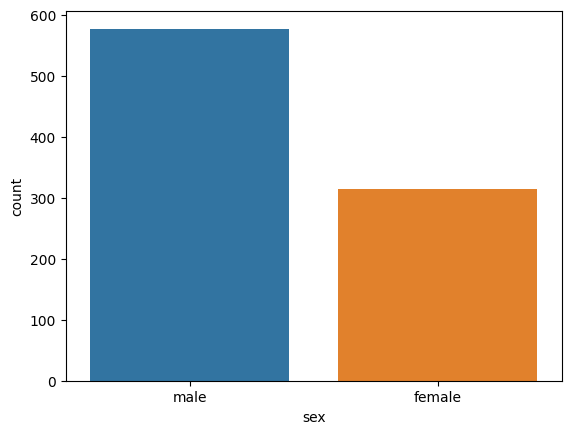

#########################


In [50]:
cat_summary(df,"sex",plot=True)

In [ ]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df,col,plot=True)
    else:
        cat_summary(df,col,plot=True)

# Sayısal Değişken Analizi

In [57]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df[["age","fare"]].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [61]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]

In [64]:
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

In [65]:
def num_summary(dataframe,numerical_col):
    print(dataframe[numerical_col].describe().T)

In [66]:
num_summary(df,"age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [75]:
def num_summary(dataframe,numerical_col,plot=False):
    print(dataframe[numerical_col].describe().T)
    if plot:
        sns.histplot(data=dataframe,x=numerical_col)
        print("#######################33")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
#######################33
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
#######################33


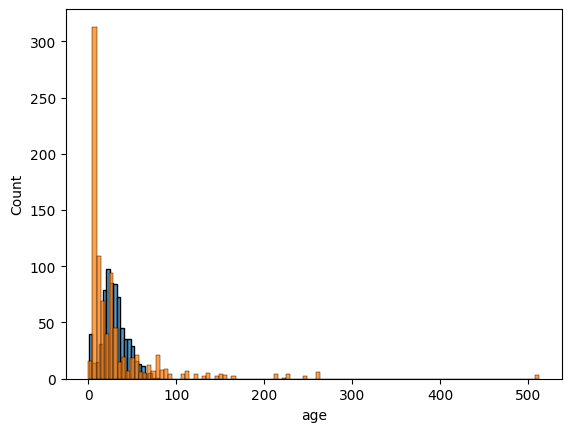

In [76]:
for col in num_cols:
    num_summary(df,col,plot=True)

# Değişkenlerin Yakalanması

In [77]:
df = sns.load_dataset("titanic")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    """
    Parameters:
    Return:
    """
    cat_cols = [col for col in df.columns if 
    str(df[col].dtypes) in ["category","object","bool"]]

    num_but_cat = [col for col in df.columns if 
    df[col].nunique()<10 and df[col].dtypes in ["int64","float64"]]

    cat_but_car = [col for col in df.columns 
    if df[col].nunique()>20 and str(df[col].dtypes) in ["category","object"]]

    cat_cols = cat_cols+num_but_cat

    cat_cols = [col for col in cat_cols not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols,num_cols,cat_but_car



In [82]:
grab_col_names(df)

TypeError: 'bool' object is not iterable

# Hedef Değişken Analizi

In [83]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

   survived      Ratio
0       549  61.616162
1       342  38.383838


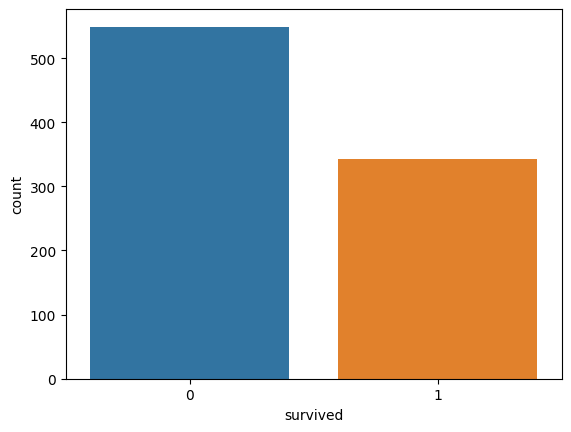

#########################


In [86]:
cat_summary(df,"survived",plot=True)

In [87]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [98]:
import random


T = random.randrange(0,2)

In [99]:
T

0

In [100]:
number = input()

print(type(number))

<class 'str'>
